# Helpers and things I have created for fetching hex maze data

In [5]:
import spyglass.common as sgc
import spyglass.position as sgp
import spyglass.data_import as sgi

from hexmaze import plot_hex_maze
from spyglass_hexmaze.hex_maze_behavior import (
    HexMazeBlock,
    HexPosition,
    HexPath,
    HexMazeChoice,
    HexMazeTrialHistory,
)

nwb_file_name = "IM-1478_20220726_.nwb"
nwb_key = {"nwb_file_name": nwb_file_name}

## Fetch data from `HexMazeBlock` and `HexMazeBlock.Trial` tables

Both of these tables have the secondary key `interval_list_name`, so we can't do a regular join using `*`.

I have a function `HexMazeBlock().join_with_trial()` that automatically renames these to `block_interval_list_name` and `trial_interval_list_name` so we can join them

In [6]:
from spyglass_hexmaze.hex_maze_behavior import HexMazeBlock

# block table
display(HexMazeBlock() & nwb_key)

# trial table
display(HexMazeBlock.Trial() & nwb_key)

# block + trial table !
display(HexMazeBlock().join_with_trial() & nwb_key)

nwb_file_name name of the NWB file,epoch the session epoch for this task and apparatus(1 based),block the block number within the epoch,config_id maze configuration as a string,interval_list_name descriptive name of this interval list,p_a probability of reward at port A,p_b probability of reward at port B,p_c probability of reward at port C,num_trials number of trials in this block,task_type 'barrier shift' or 'probabilty shift'
IM-1478_20220726_.nwb,0,1,"5,15,16,18,22,29,36,44,45",epoch0_block1,90.0,10.0,50.0,62,probability change
IM-1478_20220726_.nwb,0,2,"5,15,16,18,22,29,36,44,45",epoch0_block2,50.0,90.0,10.0,61,probability change
IM-1478_20220726_.nwb,0,3,"5,15,16,18,22,29,36,44,45",epoch0_block3,10.0,50.0,90.0,12,probability change


nwb_file_name name of the NWB file,epoch the session epoch for this task and apparatus(1 based),block the block number within the epoch,block_trial_num trial number within the block,interval_list_name descriptive name of this interval list,epoch_trial_num trial number within the epoch,reward if the rat got a reward,"start_port A, B, or C","end_port A, B, or C","opto_cond description of opto condition, if any (delay / no_delay)","poke_interval np.array of [poke_in, poke_out]",duration trial duration in seconds
IM-1478_20220726_.nwb,0,1,1,epoch0_block1_trial1,1,0,None,B,None,=BLOB=,4.41332
IM-1478_20220726_.nwb,0,1,2,epoch0_block1_trial2,2,0,B,A,None,=BLOB=,19.7859
IM-1478_20220726_.nwb,0,1,3,epoch0_block1_trial3,3,0,A,B,None,=BLOB=,34.3184
IM-1478_20220726_.nwb,0,1,4,epoch0_block1_trial4,4,1,B,C,None,=BLOB=,31.8525
IM-1478_20220726_.nwb,0,1,5,epoch0_block1_trial5,5,0,C,B,None,=BLOB=,24.1405
IM-1478_20220726_.nwb,0,1,6,epoch0_block1_trial6,6,1,B,A,None,=BLOB=,25.1743
IM-1478_20220726_.nwb,0,1,7,epoch0_block1_trial7,7,1,A,C,None,=BLOB=,19.5397
IM-1478_20220726_.nwb,0,1,8,epoch0_block1_trial8,8,1,C,A,None,=BLOB=,18.8619
IM-1478_20220726_.nwb,0,1,9,epoch0_block1_trial9,9,0,A,B,None,=BLOB=,16.3381
IM-1478_20220726_.nwb,0,1,10,epoch0_block1_trial10,10,0,B,C,None,=BLOB=,66.7565


nwb_file_name name of the NWB file,epoch the session epoch for this task and apparatus(1 based),block the block number within the epoch,block_trial_num trial number within the block,config_id maze configuration as a string,block_interval_list_name descriptive name of this interval list,p_a probability of reward at port A,p_b probability of reward at port B,p_c probability of reward at port C,num_trials number of trials in this block,task_type 'barrier shift' or 'probabilty shift',trial_interval_list_name descriptive name of this interval list,epoch_trial_num trial number within the epoch,reward if the rat got a reward,"start_port A, B, or C","end_port A, B, or C","opto_cond description of opto condition, if any (delay / no_delay)","poke_interval np.array of [poke_in, poke_out]",duration trial duration in seconds
IM-1478_20220726_.nwb,0,1,1,"5,15,16,18,22,29,36,44,45",epoch0_block1,90.0,10.0,50.0,62,probability change,epoch0_block1_trial1,1,0,None,B,None,=BLOB=,4.41332
IM-1478_20220726_.nwb,0,1,2,"5,15,16,18,22,29,36,44,45",epoch0_block1,90.0,10.0,50.0,62,probability change,epoch0_block1_trial2,2,0,B,A,None,=BLOB=,19.7859
IM-1478_20220726_.nwb,0,1,3,"5,15,16,18,22,29,36,44,45",epoch0_block1,90.0,10.0,50.0,62,probability change,epoch0_block1_trial3,3,0,A,B,None,=BLOB=,34.3184
IM-1478_20220726_.nwb,0,1,4,"5,15,16,18,22,29,36,44,45",epoch0_block1,90.0,10.0,50.0,62,probability change,epoch0_block1_trial4,4,1,B,C,None,=BLOB=,31.8525
IM-1478_20220726_.nwb,0,1,5,"5,15,16,18,22,29,36,44,45",epoch0_block1,90.0,10.0,50.0,62,probability change,epoch0_block1_trial5,5,0,C,B,None,=BLOB=,24.1405
IM-1478_20220726_.nwb,0,1,6,"5,15,16,18,22,29,36,44,45",epoch0_block1,90.0,10.0,50.0,62,probability change,epoch0_block1_trial6,6,1,B,A,None,=BLOB=,25.1743
IM-1478_20220726_.nwb,0,1,7,"5,15,16,18,22,29,36,44,45",epoch0_block1,90.0,10.0,50.0,62,probability change,epoch0_block1_trial7,7,1,A,C,None,=BLOB=,19.5397
IM-1478_20220726_.nwb,0,1,8,"5,15,16,18,22,29,36,44,45",epoch0_block1,90.0,10.0,50.0,62,probability change,epoch0_block1_trial8,8,1,C,A,None,=BLOB=,18.8619
IM-1478_20220726_.nwb,0,1,9,"5,15,16,18,22,29,36,44,45",epoch0_block1,90.0,10.0,50.0,62,probability change,epoch0_block1_trial9,9,0,A,B,None,=BLOB=,16.3381
IM-1478_20220726_.nwb,0,1,10,"5,15,16,18,22,29,36,44,45",epoch0_block1,90.0,10.0,50.0,62,probability change,epoch0_block1_trial10,10,0,B,C,None,=BLOB=,66.7565


## Fetch choice data for each trial from the `HexMazeChoice` table

There is one entry in the `HexMazeChoice` table per trial, excluding the first trial in each epoch because there is no start port, so no choice direction

In [7]:
from spyglass_hexmaze.hex_maze_behavior import HexMazeBlock, HexMazeChoice

# See HexMazeChoice
display(HexMazeChoice() & nwb_key)

# And we can join it with the trial table too! Or the block table, etc etc
display(HexMazeChoice() * HexMazeBlock.Trial() & nwb_key)

nwb_file_name name of the NWB file,epoch the session epoch for this task and apparatus(1 based),block the block number within the epoch,block_trial_num trial number within the block,choice_direction 'left' or 'right',reward_prob_chosen chosen reward probability,reward_prob_unchosen unchosen reward probability,reward_prob_diff p(chosen) - p(unchosen),path_length_chosen length of the chosen path,path_length_unchosen length of the unchosen path,path_length_diff chosen path length - unchosen path length
IM-1478_20220726_.nwb,0,1,2,left,90.0,50.0,40.0,15,17,-2
IM-1478_20220726_.nwb,0,1,3,right,10.0,50.0,-40.0,15,17,-2
IM-1478_20220726_.nwb,0,1,4,right,50.0,90.0,-40.0,17,15,2
IM-1478_20220726_.nwb,0,1,5,left,10.0,90.0,-80.0,17,17,0
IM-1478_20220726_.nwb,0,1,6,left,90.0,50.0,40.0,15,17,-2
IM-1478_20220726_.nwb,0,1,7,left,50.0,10.0,40.0,17,15,2
IM-1478_20220726_.nwb,0,1,8,right,90.0,10.0,80.0,17,17,0
IM-1478_20220726_.nwb,0,1,9,right,10.0,50.0,-40.0,15,17,-2
IM-1478_20220726_.nwb,0,1,10,right,50.0,90.0,-40.0,17,15,2
IM-1478_20220726_.nwb,0,1,11,right,90.0,10.0,80.0,17,17,0


nwb_file_name name of the NWB file,epoch the session epoch for this task and apparatus(1 based),block the block number within the epoch,block_trial_num trial number within the block,choice_direction 'left' or 'right',reward_prob_chosen chosen reward probability,reward_prob_unchosen unchosen reward probability,reward_prob_diff p(chosen) - p(unchosen),path_length_chosen length of the chosen path,path_length_unchosen length of the unchosen path,path_length_diff chosen path length - unchosen path length,interval_list_name descriptive name of this interval list,epoch_trial_num trial number within the epoch,reward if the rat got a reward,"start_port A, B, or C","end_port A, B, or C","opto_cond description of opto condition, if any (delay / no_delay)","poke_interval np.array of [poke_in, poke_out]",duration trial duration in seconds
IM-1478_20220726_.nwb,0,1,2,left,90.0,50.0,40.0,15,17,-2,epoch0_block1_trial2,2,0,B,A,None,=BLOB=,19.7859
IM-1478_20220726_.nwb,0,1,3,right,10.0,50.0,-40.0,15,17,-2,epoch0_block1_trial3,3,0,A,B,None,=BLOB=,34.3184
IM-1478_20220726_.nwb,0,1,4,right,50.0,90.0,-40.0,17,15,2,epoch0_block1_trial4,4,1,B,C,None,=BLOB=,31.8525
IM-1478_20220726_.nwb,0,1,5,left,10.0,90.0,-80.0,17,17,0,epoch0_block1_trial5,5,0,C,B,None,=BLOB=,24.1405
IM-1478_20220726_.nwb,0,1,6,left,90.0,50.0,40.0,15,17,-2,epoch0_block1_trial6,6,1,B,A,None,=BLOB=,25.1743
IM-1478_20220726_.nwb,0,1,7,left,50.0,10.0,40.0,17,15,2,epoch0_block1_trial7,7,1,A,C,None,=BLOB=,19.5397
IM-1478_20220726_.nwb,0,1,8,right,90.0,10.0,80.0,17,17,0,epoch0_block1_trial8,8,1,C,A,None,=BLOB=,18.8619
IM-1478_20220726_.nwb,0,1,9,right,10.0,50.0,-40.0,15,17,-2,epoch0_block1_trial9,9,0,A,B,None,=BLOB=,16.3381
IM-1478_20220726_.nwb,0,1,10,right,50.0,90.0,-40.0,17,15,2,epoch0_block1_trial10,10,0,B,C,None,=BLOB=,66.7565
IM-1478_20220726_.nwb,0,1,11,right,90.0,10.0,80.0,17,17,0,epoch0_block1_trial11,11,1,C,A,None,=BLOB=,36.7861


## Fetch port choice and reward history from the `HexMazeTrialHistory` table

Or calculate what you want using the helper class `HexMazeTrialContext`

In [8]:
from spyglass_hexmaze.hex_maze_behavior import HexMazeTrialHistory, HexMazeTrialContext

# See HexMazeTrialHistory
display(HexMazeTrialHistory() & nwb_key)

# Fetch a trial key as an example
trial_keys = (HexMazeTrialHistory() & nwb_key).fetch("KEY")
trial_key = trial_keys[31]

# Create a HexMazeTrialContext instance for this trial
trial_in_context = HexMazeTrialContext(trial_key)

# Get this trial
print(f"This trial: {trial_in_context.trial}")

# Get this trial's history (all list of all trials in the epoch before this trial)
history = trial_in_context.history

# Get "2 trials ago", or any number of trials ago
trials_ago = 2
print(
    f"Trial {trials_ago} trials ago: {trial_in_context.get_trial_n_ago(trials_ago=trials_ago)}\n"
)

n = 5
print(
    f"Was the visit to this port {n} visits ago rewarded? {trial_in_context.was_prev_visit_to_port_rewarded(visits_ago=n)}"
)
print(
    f"Was the visit to this port {n} visits ago same path? {trial_in_context.was_prev_visit_to_port_same_path(visits_ago=n)}"
)
print(
    f"Was the trial {n} trials ago rewarded? {trial_in_context.was_rewarded_n_trials_ago(trials_ago=n)}\n"
)

print(
    f"There have been {trial_in_context.num_trials_since_port_visit()} trials since the last visit to this port"
)
print(
    f"There have been {trial_in_context.num_trials_since_reward()} trials since the last reward\n"
)

# Get previous visits to this port (all and split by same/alt path)
prev_visits_to_port = trial_in_context.get_previous_visits_to_port()
prev_visits_same_path = trial_in_context.get_previous_visits_same_path()
prev_visits_alt_path = trial_in_context.get_previous_visits_alt_path()

print(f"There are {len(prev_visits_to_port)} previous visits to this port")
print(f"There are {len(prev_visits_same_path)} previous visits on the same path")
print(
    f"There are {len(prev_visits_alt_path)} previous visits on the alternative path\n"
)

n = 10
print(
    f"There are {trial_in_context.num_rewards_last_n_trials(n=n)} rewards in the last {n} trials"
)
print(
    f"There are {trial_in_context.num_port_visits_last_n_trials(n=n)} port visits in the last {n} trials"
)
print(
    f"There are {trial_in_context.num_rewards_last_n_port_visits(n=n)} rewards in the last {n} port visits"
)
print(
    f"There are {trial_in_context.num_rewards_at_port_last_n_trials(n=n)} rewards at this port in the last {n} trials"
)

nwb_file_name name of the NWB file,epoch the session epoch for this task and apparatus(1 based),block the block number within the epoch,block_trial_num trial number within the block,port_visit_1prev_rwd if the previous visit to this port was rewarded,port_visit_2prev_rwd if the second-to-last visit to this port was rewarded,port_visit_3prev_rwd if the third-to-last visit to this port was rewarded,port_visit_1prev_same_path if the previous visit to this port was via the same path,port_visit_2prev_same_path if the second-to-last visit to this port was via the same path,port_visit_3prev_same_path if the third-to-last visit to this port was via the same path,trial_1prev_rwd if the rat got a reward on the previous trial,trial_2prev_rwd if the rat got a reward 2 trials ago,trial_3prev_rwd if the rat got a reward 3 trials ago,trial_4prev_rwd if the rat got a reward 4 trials ago,trial_5prev_rwd if the rat got a reward 5 trials ago,trials_since_port_visit number of trials since the last visit to this port,trials_since_rwd number of trials since the last reward
IM-1478_20220726_.nwb,0,1,1,0,0,0,0,0,0,0,0,0,0,0,-1,-1
IM-1478_20220726_.nwb,0,1,2,0,0,0,0,0,0,0,0,0,0,0,-1,-1
IM-1478_20220726_.nwb,0,1,3,0,0,0,0,0,0,0,0,0,0,0,2,-1
IM-1478_20220726_.nwb,0,1,4,0,0,0,0,0,0,0,0,0,0,0,-1,-1
IM-1478_20220726_.nwb,0,1,5,0,0,0,0,0,0,1,0,0,0,0,2,1
IM-1478_20220726_.nwb,0,1,6,0,0,0,1,0,0,0,1,0,0,0,4,2
IM-1478_20220726_.nwb,0,1,7,1,0,0,0,0,0,1,0,1,0,0,3,1
IM-1478_20220726_.nwb,0,1,8,1,0,0,0,0,0,1,1,0,1,0,2,1
IM-1478_20220726_.nwb,0,1,9,0,0,0,0,1,0,1,1,1,0,1,4,1
IM-1478_20220726_.nwb,0,1,10,1,1,0,0,1,0,0,1,1,1,0,3,2


This trial: {'nwb_file_name': 'IM-1478_20220726_.nwb', 'epoch': 0, 'block': 1, 'block_trial_num': 32, 'interval_list_name': 'epoch0_block1_trial32', 'epoch_trial_num': 32, 'reward': 1, 'start_port': 'B', 'end_port': 'A', 'opto_cond': 'None', 'poke_interval': array([912.596    , 918.9364928]), 'duration': 31.7008}
Trial 2 trials ago: {'nwb_file_name': 'IM-1478_20220726_.nwb', 'epoch': 0, 'block': 1, 'block_trial_num': 30, 'interval_list_name': 'epoch0_block1_trial30', 'epoch_trial_num': 30, 'reward': 1, 'start_port': 'C', 'end_port': 'A', 'opto_cond': 'None', 'poke_interval': array([850.584    , 859.5007616]), 'duration': 22.4192}

Was the visit to this port 5 visits ago rewarded? True
Was the visit to this port 5 visits ago same path? False
Was the trial 5 trials ago rewarded? True

There have been 2 trials since the last visit to this port
There have been 2 trials since the last reward

There are 10 previous visits to this port
There are 3 previous visits on the same path
There are 7 

## Fetch data from the `HexPath` table

In [10]:
# Example of fetching data from HexPath table
hex_path_key = (HexPath() & nwb_key).fetch("KEY")[0]
display(HexPath() & hex_path_key)

# Get hex path dataframe for the whole epoch
epoch_df = (HexPath & hex_path_key).fetch1_dataframe()
display(epoch_df)

# Get hex path dataframe for a specific block
block_df = (HexPath & hex_path_key).fetch_block(block=1)
display(block_df)

# Get hex path dataframe for a specific trial
trial_df = (HexPath & hex_path_key).fetch_trial(block=1, block_trial_num=10)
display(trial_df)

# Get hex path dataframe for a range of trials (here, trials 1-3 for all blocks)
trials_df = (HexPath & hex_path_key).fetch_trials(block_trial_num=[1, 2, 3])
display(trials_df)

pos_merge_id,nwb_file_name name of the NWB file,epoch the session epoch for this task and apparatus(1 based),analysis_file_name name of the file,hex_path_object_id
cfe6c111-1aa1-a41d-858c-f307e7a53b7c,IM-1478_20220726_.nwb,0,IM-1478_20220726_2A2O0R9ANC.nwb,7cbed8bd-f26a-407d-a42b-08f255c9307a


,nwb_file_name,epoch,block,block_trial_num,epoch_trial_num,hex,entry_time,exit_time,duration,hex_in_trial,hex_entry_num,hexes_from_start,hexes_from_end,hex_type,maze_portion
id,,,,,,,,,,,,,,,
0,IM-1478_20220726_.nwb,0,1,1,1,49,49.924743,50.526743,0.602,1,1,-1,1,optimal,chosen
1,IM-1478_20220726_.nwb,0,1,1,1,2,50.528743,54.334743,3.806,2,1,-1,0,optimal,chosen
2,IM-1478_20220726_.nwb,0,1,2,2,2,54.336743,54.960743,0.624,1,1,0,14,optimal,start
3,IM-1478_20220726_.nwb,0,1,2,2,49,54.962743,55.204743,0.242,2,1,1,13,optimal,start
4,IM-1478_20220726_.nwb,0,1,2,2,38,55.206743,55.800743,0.594,3,1,2,12,optimal,start
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2965,IM-1478_20220726_.nwb,0,3,12,135,37,4363.960606,4364.056606,0.096,39,4,10,4,optimal,chosen
2966,IM-1478_20220726_.nwb,0,3,12,135,42,4364.058606,4364.368606,0.310,40,1,11,3,optimal,chosen
2967,IM-1478_20220726_.nwb,0,3,12,135,47,4364.370606,4364.686606,0.316,41,1,12,2,optimal,chosen


,nwb_file_name,epoch,block,block_trial_num,epoch_trial_num,hex,entry_time,exit_time,duration,hex_in_trial,hex_entry_num,hexes_from_start,hexes_from_end,hex_type,maze_portion
0,IM-1478_20220726_.nwb,0,1,1,1,49,49.924743,50.526743,0.602,1,1,-1,1,optimal,chosen
1,IM-1478_20220726_.nwb,0,1,1,1,2,50.528743,54.334743,3.806,2,1,-1,0,optimal,chosen
2,IM-1478_20220726_.nwb,0,1,2,2,2,54.336743,54.960743,0.624,1,1,0,14,optimal,start
3,IM-1478_20220726_.nwb,0,1,2,2,49,54.962743,55.204743,0.242,2,1,1,13,optimal,start
4,IM-1478_20220726_.nwb,0,1,2,2,38,55.206743,55.800743,0.594,3,1,2,12,optimal,start
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1330,IM-1478_20220726_.nwb,0,1,62,62,23,1655.508692,1655.876692,0.368,15,1,12,4,optimal,chosen
1331,IM-1478_20220726_.nwb,0,1,62,62,28,1655.878692,1656.190692,0.312,16,1,13,3,optimal,chosen
1332,IM-1478_20220726_.nwb,0,1,62,62,33,1656.192692,1656.398692,0.206,17,1,14,2,optimal,chosen
1333,IM-1478_20220726_.nwb,0,1,62,62,48,1656.400692,1656.558692,0.158,18,1,15,1,optimal,chosen


,nwb_file_name,epoch,block,block_trial_num,epoch_trial_num,hex,entry_time,exit_time,duration,hex_in_trial,hex_entry_num,hexes_from_start,hexes_from_end,hex_type,maze_portion
0,IM-1478_20220726_.nwb,0,1,10,10,2,244.348737,244.624737,0.276,1,1,0,16,optimal,start
1,IM-1478_20220726_.nwb,0,1,10,10,49,244.626737,246.232737,1.606,2,1,1,15,optimal,start
2,IM-1478_20220726_.nwb,0,1,10,10,38,246.234737,246.938737,0.704,3,1,2,14,optimal,start
3,IM-1478_20220726_.nwb,0,1,10,10,32,246.940737,247.724737,0.784,4,1,3,13,optimal,start
4,IM-1478_20220726_.nwb,0,1,10,10,27,247.726737,248.874737,1.148,5,1,4,14,dead_end,start
5,IM-1478_20220726_.nwb,0,1,10,10,32,248.876737,249.138737,0.262,6,2,3,13,optimal,start
6,IM-1478_20220726_.nwb,0,1,10,10,37,249.140737,249.202737,0.062,7,1,4,12,optimal,start
7,IM-1478_20220726_.nwb,0,1,10,10,31,249.204737,249.372737,0.168,8,1,5,11,optimal,start
8,IM-1478_20220726_.nwb,0,1,10,10,26,249.374737,249.910737,0.536,9,1,6,10,optimal,start
9,IM-1478_20220726_.nwb,0,1,10,10,21,249.912737,254.440737,4.528,10,1,7,9,optimal,choice_point


,nwb_file_name,epoch,block,block_trial_num,epoch_trial_num,hex,entry_time,exit_time,duration,hex_in_trial,hex_entry_num,hexes_from_start,hexes_from_end,hex_type,maze_portion
0,IM-1478_20220726_.nwb,0,1,1,1,49,49.924743,50.526743,0.602,1,1,-1,1,optimal,chosen
1,IM-1478_20220726_.nwb,0,1,1,1,2,50.528743,54.334743,3.806,2,1,-1,0,optimal,chosen
2,IM-1478_20220726_.nwb,0,1,2,2,2,54.336743,54.960743,0.624,1,1,0,14,optimal,start
3,IM-1478_20220726_.nwb,0,1,2,2,49,54.962743,55.204743,0.242,2,1,1,13,optimal,start
4,IM-1478_20220726_.nwb,0,1,2,2,38,55.206743,55.800743,0.594,3,1,2,12,optimal,start
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164,IM-1478_20220726_.nwb,0,3,3,126,23,3898.038621,3898.838621,0.800,13,1,12,4,optimal,chosen
165,IM-1478_20220726_.nwb,0,3,3,126,28,3898.840621,3899.138621,0.298,14,1,13,3,optimal,chosen
166,IM-1478_20220726_.nwb,0,3,3,126,33,3899.140621,3899.340621,0.200,15,1,14,2,optimal,chosen
167,IM-1478_20220726_.nwb,0,3,3,126,48,3899.342621,3899.494621,0.152,16,1,15,1,optimal,chosen


Take a look at the rat's path through the hex maze for block 1, trial 3

,nwb_file_name,epoch,block,block_trial_num,epoch_trial_num,hex,entry_time,exit_time,duration,hex_in_trial,hex_entry_num,hexes_from_start,hexes_from_end,hex_type,maze_portion
0,IM-1478_20220726_.nwb,0,1,3,3,1,74.122743,74.328743,0.206,1,1,0,14,optimal,start
1,IM-1478_20220726_.nwb,0,1,3,3,4,74.330743,75.262743,0.932,2,1,1,13,optimal,start
2,IM-1478_20220726_.nwb,0,1,3,3,6,75.264743,75.418743,0.154,3,1,2,12,optimal,start
3,IM-1478_20220726_.nwb,0,1,3,3,8,75.420743,76.332743,0.912,4,1,3,11,optimal,start
4,IM-1478_20220726_.nwb,0,1,3,3,11,76.334743,76.456743,0.122,5,1,4,10,optimal,start
5,IM-1478_20220726_.nwb,0,1,3,3,14,76.458743,76.700743,0.242,6,1,5,9,optimal,start
6,IM-1478_20220726_.nwb,0,1,3,3,17,76.702743,76.990743,0.288,7,1,6,8,optimal,start
7,IM-1478_20220726_.nwb,0,1,3,3,21,76.992743,78.072743,1.080,8,1,7,7,optimal,choice_point
8,IM-1478_20220726_.nwb,0,1,3,3,25,78.074743,80.264742,2.190,9,1,8,8,optimal,unchosen
9,IM-1478_20220726_.nwb,0,1,3,3,20,80.266742,82.470742,2.204,10,1,9,9,optimal,unchosen


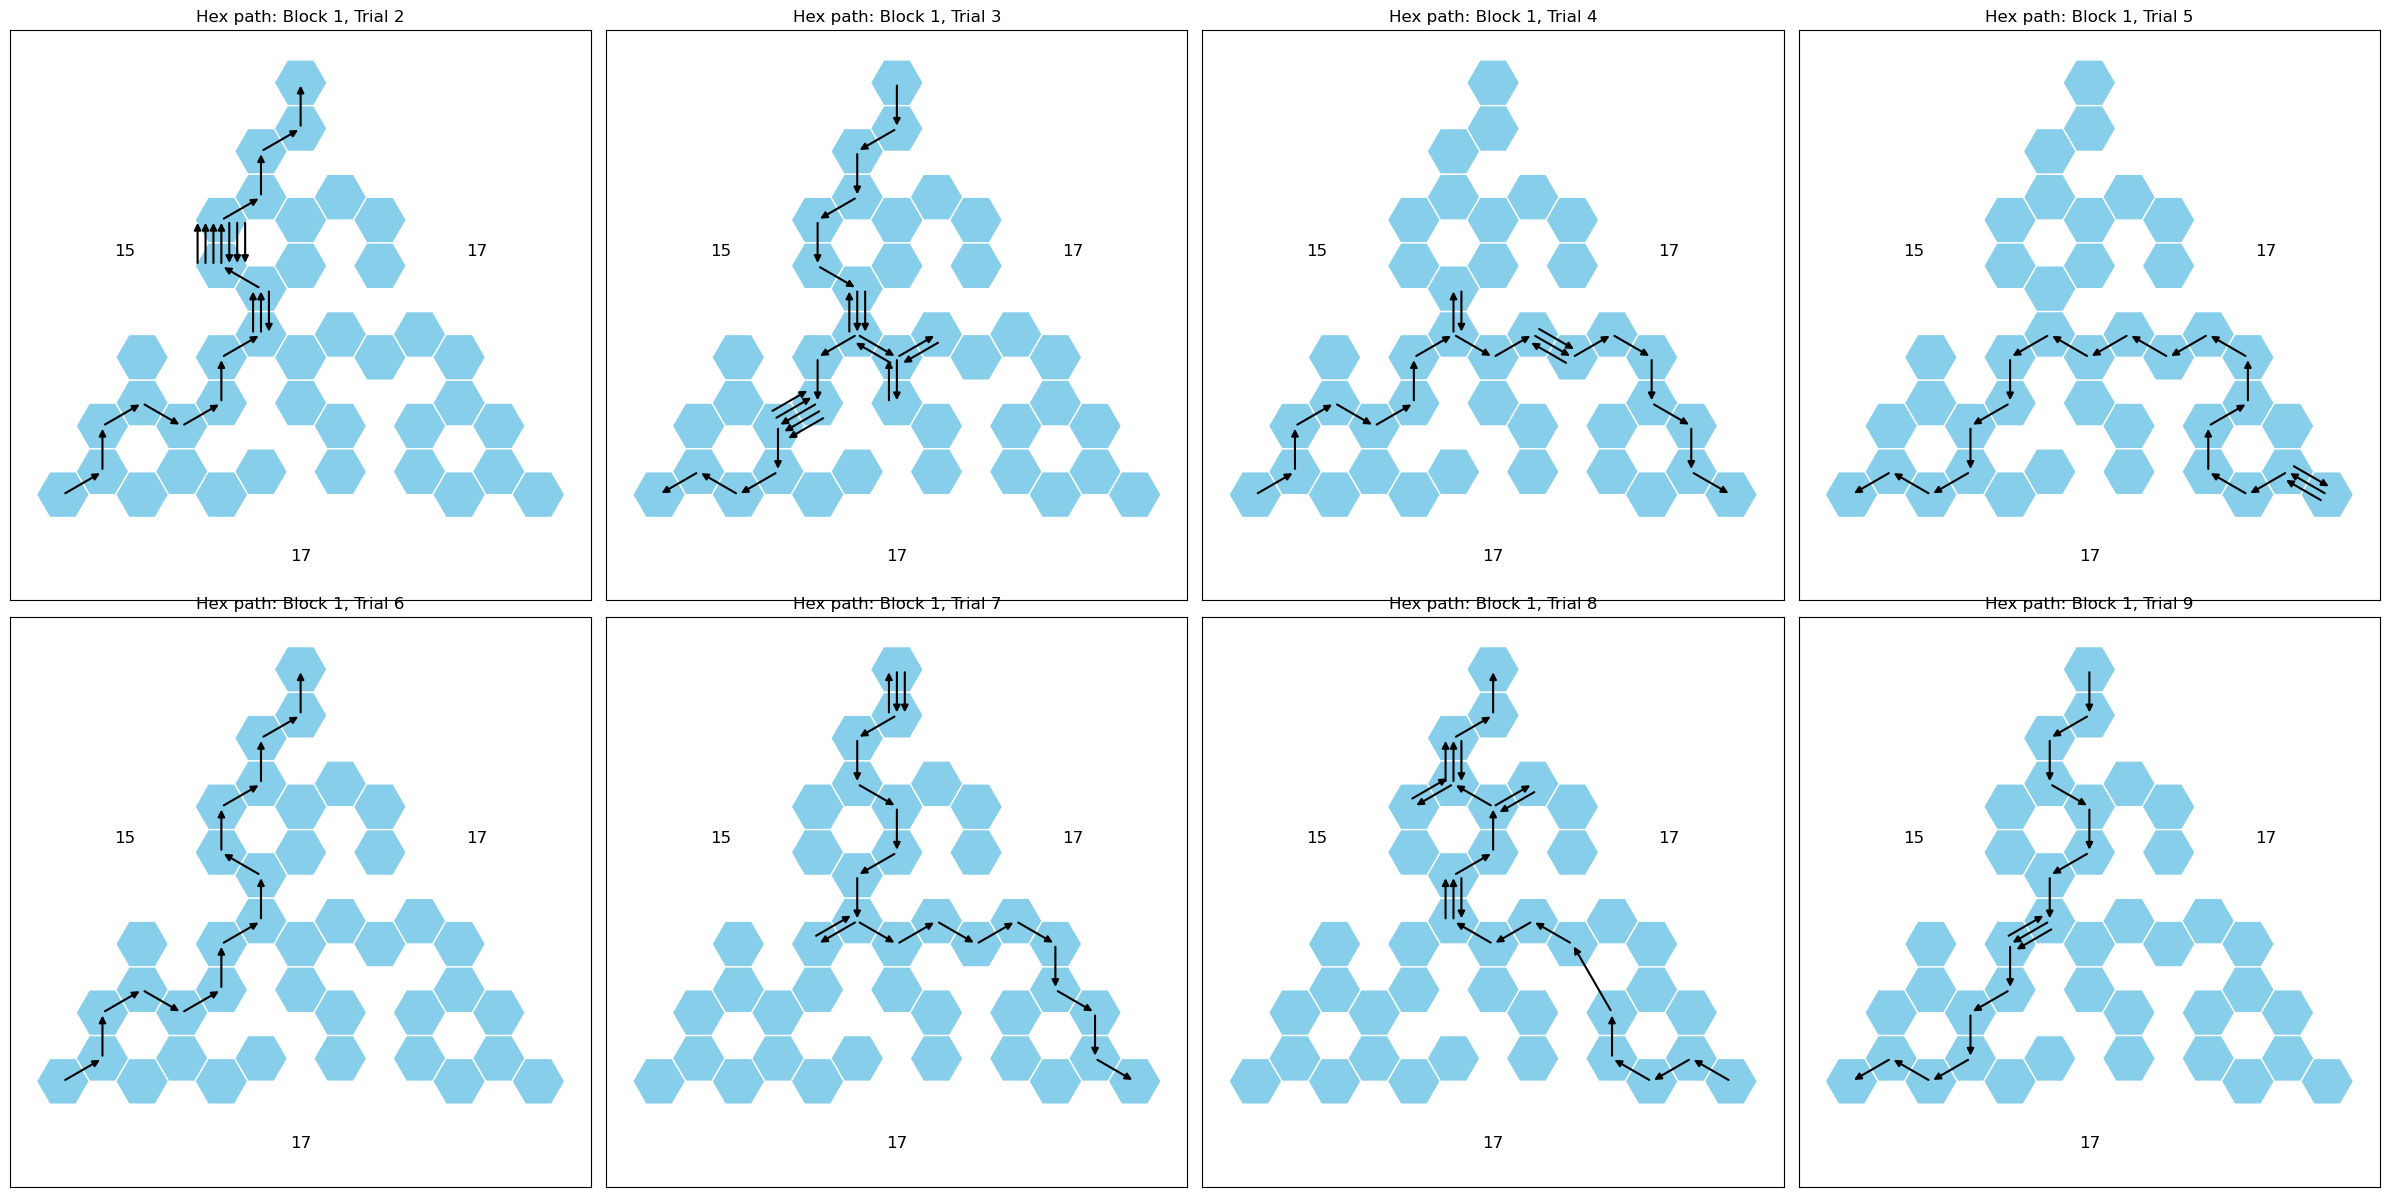

In [ ]:
trial_df = (HexPath & hex_path_key).fetch_trial(block=1, block_trial_num=3)
display(trial_df)

# Plot a couple of paths!
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 4, figsize=(24, 12))
axes = axes.flatten()

# Loop over trial numbers and plot hex path
for i, tri_num in enumerate(range(2, 10)):
    (HexPath() & hex_path_key).plot_trial(block=1, block_trial_num=tri_num, ax=axes[i])
plt.tight_layout()
plt.show()

## Fetch hex position data

In [22]:
from spyglass_hexmaze.hex_maze_behavior import HexPosition

pos_key = {
    "pos_merge_id": "73546f6a-c60f-09f3-0c22-c5e44b3259de",
    "nwb_file_name": "Toby20250316_.nwb",
    "epoch": 7,
}

display(HexPosition() & pos_key)

# Fetch rat's position + assigned hex
hex_and_pos_df = (HexPosition() & pos_key).fetch_hex_and_position_dataframe()
display(hex_and_pos_df)

pos_merge_id,nwb_file_name name of the NWB file,epoch the session epoch for this task and apparatus(1 based),analysis_file_name name of the file,hex_assignment_object_id
73546f6a-c60f-09f3-0c22-c5e44b3259de,Toby20250316_.nwb,7,Toby20250316_5NT6M4Z1ZP.nwb,095e360c-ee0c-4ecc-b610-75f81862e7c1


[00:36:52][WARNING] Spyglass: Upsampled position data, frame indices are invalid. Setting add_frame_ind=False


,position_x,position_y,orientation,velocity_x,velocity_y,speed,hex,hex_including_sides,distance_from_centroid
time,,,,,,,,,
1.742172e+09,62.041250,103.87250,-0.366782,38.442561,-29.824666,48.655331,44,44,2.774555
1.742172e+09,62.210588,103.72000,-0.365368,38.766769,-29.891796,48.952853,44,44,2.548839
1.742172e+09,62.301176,103.64000,-0.363602,39.087138,-29.952861,49.244068,44,44,2.429481
1.742172e+09,62.391765,103.56000,-0.361809,39.403551,-30.007786,49.528851,44,44,2.310278
1.742172e+09,62.482353,103.48000,-0.360012,39.715893,-30.056504,49.807083,44,44,2.191257
...,...,...,...,...,...,...,...,...,...
1.742175e+09,102.712500,14.82250,-1.043486,-2.234870,3.962956,4.549688,2,2,10.787333
1.742175e+09,102.711250,14.82625,-1.042798,-2.308990,3.994647,4.613961,2,2,10.784237
1.742175e+09,102.710000,14.83000,-1.042106,-2.383619,4.026486,4.679127,2,2,10.781141


## Fetch decoded hex position data

In [ ]:
from spyglass_hexmaze.hex_maze_decoding import DecodedHexPosition

decoded_pos_key = {
    "decoding_merge_id": "f40538a7-c27c-1672-f64d-a027bfb0205f",
    "nwb_file_name": "Toby20250316_.nwb",
    "epoch": 7,
}

display(DecodedHexPosition() & decoded_pos_key)

# Fetch rat's decoded position + assigned hex
decoded_hex_and_pos_df = (
    DecodedHexPosition() & decoded_pos_key
).fetch_hex_and_position_dataframe()
display(decoded_hex_and_pos_df)

## Fetch and combine position and decoded position tables

In [ ]:
from spyglass_hexmaze.hex_maze_decoding import (
    DecodedHexPositionSelection,
    DecodedHexPosition,
)

decoded_pos_key = {
    "decoding_merge_id": "f40538a7-c27c-1672-f64d-a027bfb0205f",
    "nwb_file_name": "Toby20250316_.nwb",
    "epoch": 7,
}

keys = (HexPosition & decoded_pos_key).fetch("KEY")
print(keys)

# TODO: Be able to find the position key that corresponds to the upsampled one used for decoding
# so I can automate fetching a combined dataframe here. There is probably a long range restriction for that.

position_df = (HexPosition & keys[1]).fetch_hex_and_position_dataframe()
display(position_df)

decode_df = (DecodedHexPosition & decoded_pos_key).fetch_hex_and_position_dataframe()
decode_df.columns = [f"decode_{col}" for col in decode_df.columns]
display(decode_df)

combined_df = position_df.join(decode_df)
display(combined_df)